In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 데이터 로드
dt_15 = pd.read_sas('./data/GP15_2016(200306).sas7bdat', format='sas7bdat')
dt_16 = pd.read_sas('./data/GP16_2017(200306).sas7bdat', format='sas7bdat')
dt_17 = pd.read_sas('./data/GP17__2018.sas7bdat', format='sas7bdat')
dt_18 = pd.read_sas('./data/GP18__2019.sas7bdat', format='sas7bdat')
dt_19 = pd.read_sas('./data/GP19__2020.sas7bdat', format='sas7bdat')

In [10]:
feature_list_19 = ['g191pid','g191branch','g191found','g191course','g191daynight','g191majorcat','g191school','g191area','g191sex','g191age','g191a161','g191b022','g191b023','g191b036','g191b038','g191b039','g191b040','g191f009','g191i001','g191i033','g191i037','g191i042','g191i046','g191i066','g191i076','g191l001','g191l009','g191l016','g191m002','g191k110','g191k004','g191k007','g191k009','g191k011','g191q001','g191q002','g191q003','g191q004','g191q006','g191p001','g191p028z','g191p031z','g191p036','g191p045']
feature_list_18 = ['g181pid','g181branch','g181found','g181course','g181daynight','g181majorcat','g181school','g181area','g181sex','g181age','g181a161','g181b022','g181b023','g181b036','g181b038','g181b039','g181b040','g181f009','g181i001','g181i033','g181i037','g181i042','g181i046','g181i066','g181i076','g181l001','g181l009','g181l016','g181m002','g181k110','g181k004','g181k007','g181k009','g181k011','g181q001','g181q002','g181q003','g181q004','g181q006','g181p001','g181p028z','g181p031z','g181p036','g181p045']
feature_list_17 = ['g171pid','g171branch','g171found','g171course','g171daynight','g171majorcat','g171school','g171area','g171sex','g171age','g171a161','g171b022','g171b023','g171b036','g171b038','g171b039','g171b040','g171f009','g171i001','g171i033','g171i037','g171i042','g171i046','g171i066','g171i076','g171l001','g171l009','g171l016','g171m002','g171k110','g171k004','g171k007','g171k009','g171k011','g171q001','g171q002','g171q003','g171q004','g171q006','g171p001','g171p028z','g171p031z','g171p036','g171p045']
# g161k110 NCS 시험 준비가 없어 g161o133 NCS(국가직무능력표준)기반 훈련, 교육과정, 특강 등 -들어본 경험 으로 대체
feature_list_16 = ['g161pid','g161branch','g161found','g161course','g161daynight','g161majorcat','g161school','g161area','g161sex','g161age','g161a161','g161b022','g161b023','g161b036','g161b038','g161b039','g161b040','g161f009','g161i001','g161i033','g161i037','g161i042','g161i046','g161i066','g161i076','g161l001','g161l009','g161l016','g161m002','g161o133','g161k004','g161k007','g161k009','g161k011','g161q001','g161q002','g161q003','g161q004','g161q006','g161p001','g161p028z','g161p031z','g161p036','g161p045']
# g151i037 -> g151i035, g151i046 -> g151i044, g151i066, g151i076, g151l009, g151k110
# 일본어 중국어 점수 없고 등급만 있음
# feature_list_15 = ['g151pid','g151branch','g151found','g151course','g151daynight','g151majorcat','g151school','g151area','g151sex','g151age','g151a161','g151b022','g151b023','g151b036','g151b038','g151b039','g151b040','g151f009','g151i001','g151i033','g151i037','g151i042','g151i046','g151i066','g151i076','g151l001','g151l009','g151l016','g151m002','g151o133','g151k004','g151k007','g151k009','g151k011','g151q001','g151q002','g151q003','g151q004','g151q006','g151p001','g151p028z','g151p031z','g151p036','g151p045']

feature_list_18_upper = []
for i in feature_list_18:
    feature_list_18_upper.append(i.upper())
    
#새로운 변수명
new_names = ['id','branch','found','course','daynight','major','school','school_area','sex','age','hire_state','b022','b023','b036','b038','b039','b040','f009','i001','i033','i037','i042','i046','i066','i076','l001','l009','l016','m002','k110','k004','k007','k009','k011','q001','q002','q003','q004','q006','p001','p028z','p031z','p036','p045']
use_data_19 = dt_19.loc[:,feature_list_19]
use_data_19.columns = new_names
use_data_18 = dt_18.loc[:,feature_list_18_upper]
use_data_18.columns = new_names
use_data_17 = dt_17.loc[:,feature_list_17]
use_data_17.columns = new_names
use_data_16 = dt_16.loc[:,feature_list_16]
use_data_16.columns = new_names
# use_data_15 = dt_15.loc[:,feature_list_15]


In [11]:
# 데이터 합치기
use_data = pd.concat([use_data_19,use_data_18,use_data_17,use_data_16])
use_data.head()

,id,branch,found,course,daynight,major,school,school_area,sex,age,...,q001,q002,q003,q004,q006,p001,p028z,p031z,p036,p045
0,5.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,26.333333,...,3.0,2.0,8.0,2.0,1.0,1.0,5.0,5.0,6.0,1.0
1,16.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,22.333333,...,4.0,7.0,8.0,2.0,3.0,1.0,2.0,1.0,3.0,1.0
2,22.0,1.0,3.0,3.0,1.0,1.0,1.0,9.0,2.0,21.666667,...,4.0,2.0,6.0,2.0,3.0,1.0,4.0,4.0,1.0,1.0
3,32.0,1.0,3.0,3.0,1.0,1.0,1.0,8.0,1.0,25.916667,...,4.0,7.0,7.0,1.0,2.0,1.0,5.0,5.0,1.0,2.0
4,37.0,1.0,3.0,3.0,1.0,1.0,1.0,14.0,1.0,25.500000,...,3.0,0.0,6.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0


In [12]:
use_data = use_data[use_data['l001'] == 1]
# 서울이면 0 아니면 1
use_data['school_area'] = use_data['school_area'].apply(lambda x: 0 if x == 1 else 1)
# 성별 남자 0 여자 1 
use_data['sex'] = use_data['sex'].apply(lambda x: 0 if x == 1 else 1)
# 학교 주간 0 야간 1
use_data['daynight'] = use_data['daynight'].apply(lambda x: 0 if x == 1 else 1)
# 고용보험가입여부 0 미가입,1 가입입 모른다 미가입 Nan은 미가입으로
use_data['hire_state'] = use_data['hire_state'].apply(lambda x: 1 if x == 1 else 0)
# 지원한 횟수 Nan, -1 0으로
use_data['b022'] = use_data['b022'].apply(lambda x: 0 if x == -1 else x)
use_data['b022'] = use_data['b022'].fillna(0)
# 면접 본 횟수 Nan, -1 0으로
use_data['b023'] = use_data['b023'].apply(lambda x: 0 if x == -1 else x)
use_data['b023'] = use_data['b023'].fillna(0)
# 기타 취업 노력 1예 0 아니오 Nan 아니오
use_data['b036'] = use_data['b036'].apply(lambda x: 1 if x == 1 else 0)
use_data['b038'] = use_data['b038'].apply(lambda x: 1 if x == 1 else 0)
use_data['b039'] = use_data['b039'].apply(lambda x: 1 if x == 1 else 0)
use_data['b040'] = use_data['b040'].apply(lambda x: 1 if x == 1 else 0)

len(use_data)

15585

In [16]:
columns = use_data.columns[1:17]
columns

Index(['branch', 'found', 'course', 'daynight', 'major', 'school',
       'school_area', 'sex', 'age', 'hire_state', 'b022', 'b023', 'b036',
       'b038', 'b039', 'b040'],
      dtype='object')

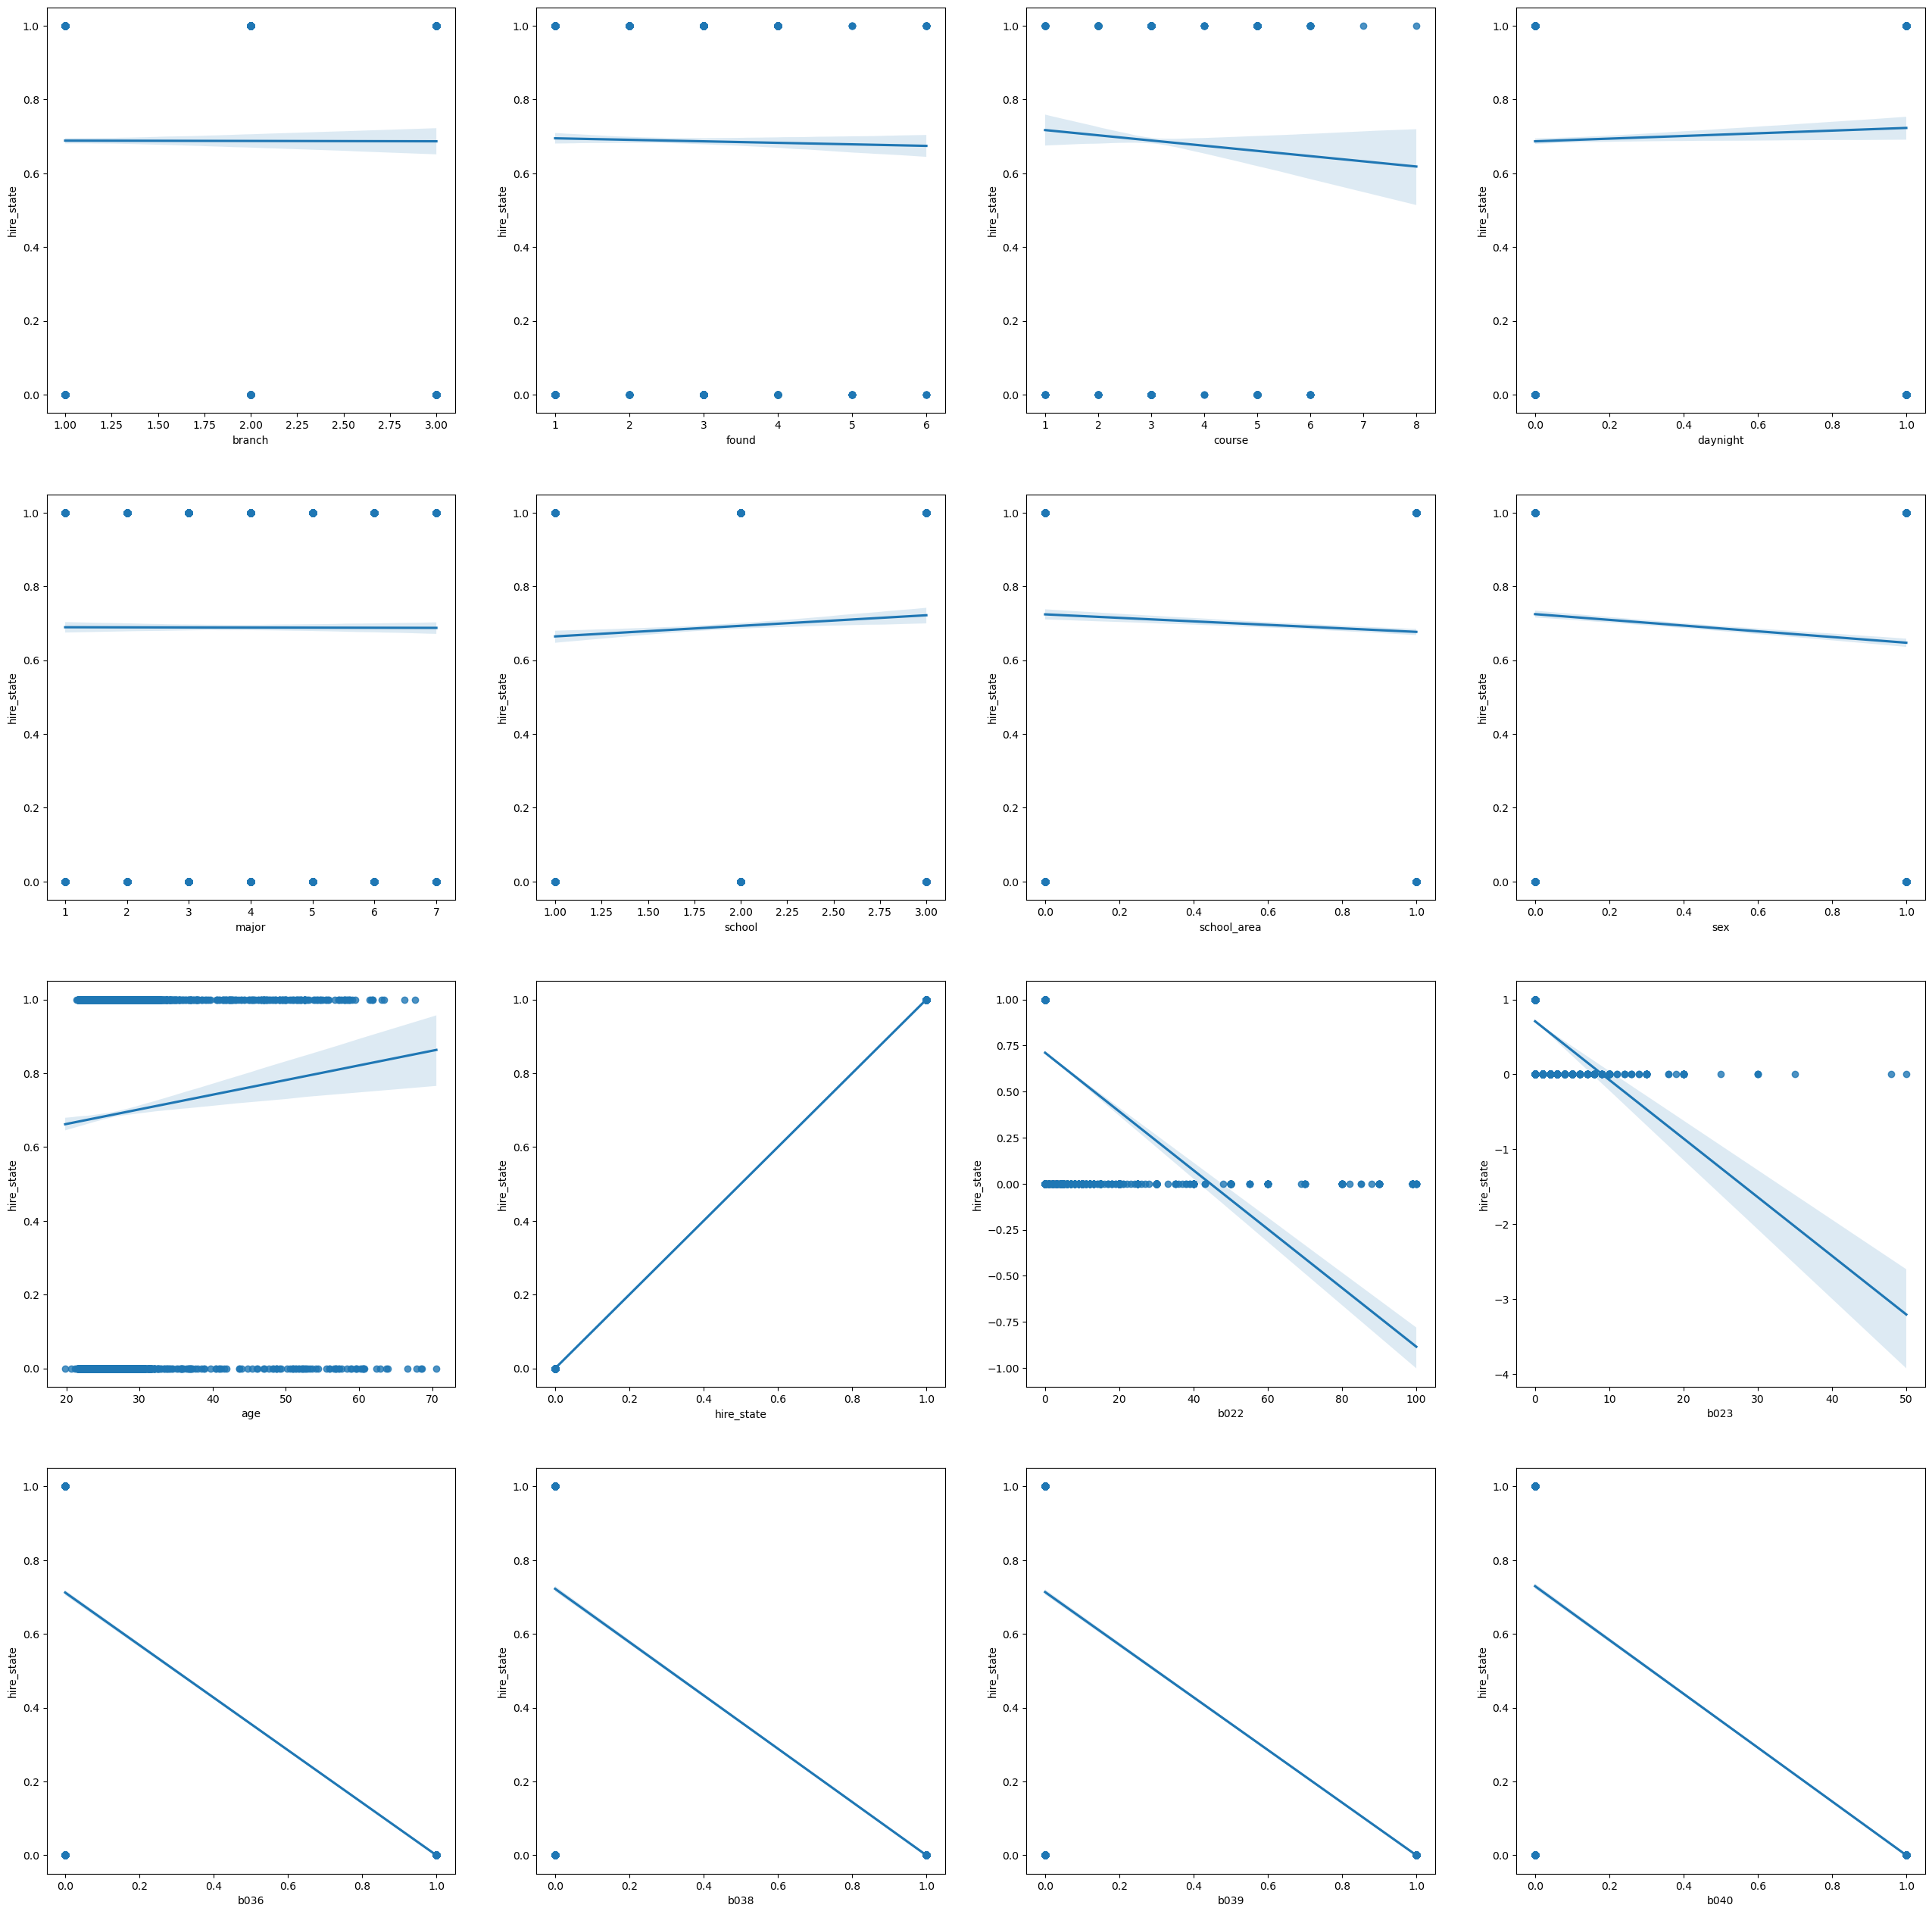

In [17]:
# regplot
fig, ax = plt.subplots(figsize=(32,32),ncols=4,nrows=4)

columns = use_data.columns[1:17]

for i, col_name in enumerate(columns):
    row = i // 4
    col = i % 4
    ax_temp = ax[row][col]

    sns.regplot(data=use_data, x=col_name, y='hire_state', ax=ax_temp)